#Image Denoising utilizando Autoencoder

#Autor: Gabriel Sete
---

##>Objetivo do código: Simular a capacidade da inteligência artificial em tratar e aumentar a qualidade/resolução de imagens.

##>Objetivo geral: Mostrar técnicas de tratamento de imagens que podem ser úteis para melhorar os métodos tradicionais e/ou comuns de anotação de dados.

##>Passos que foram seguidos:


1.   Tratar os dados do dataset
2.   Adicionar ruídos as imagens para simular situações reais
3.   Criar o Autoencoder
4.   Treiná-lo com os dados com ruídos
5.   Mostrar resultados

##*OBS: Já que os dados originais do dataset não apresentam nenhum problema de qualidade, os dados com ruídos foram considerados "originais" para a Inteligência Artificial com o intuito de simular casos reais de imagens com baixa qualidade e ver o quão eficiente a técnica pode ser



In [ ]:
#Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import *
from keras.datasets.mnist import load_data
import cv2

In [ ]:
#Divisão dos dados
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255

xtrain = xtrain.reshape((len(xtrain), 28, 28, 1)) 
xtest = xtest.reshape((len(xtest), 28, 28, 1))
 
print(xtrain.shape, xtest.shape) 

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#Função para adicionar ruído 
def add_noice(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.3
    return noisy


In [ ]:
#Aplicando ruído nos dados
x_treino = []

for img in xtrain:
    noisy= add_noice(img)
    #pixel = pixalate_image(noisy)
    x_treino.append(noisy)

x_treino = np.array(x_treino)

x_teste = []

for img in xtest:
    noisy= add_noice(img)
    #pixel = pixalate_image(noisy)
    x_teste.append(noisy)

x_teste = np.array(x_teste)

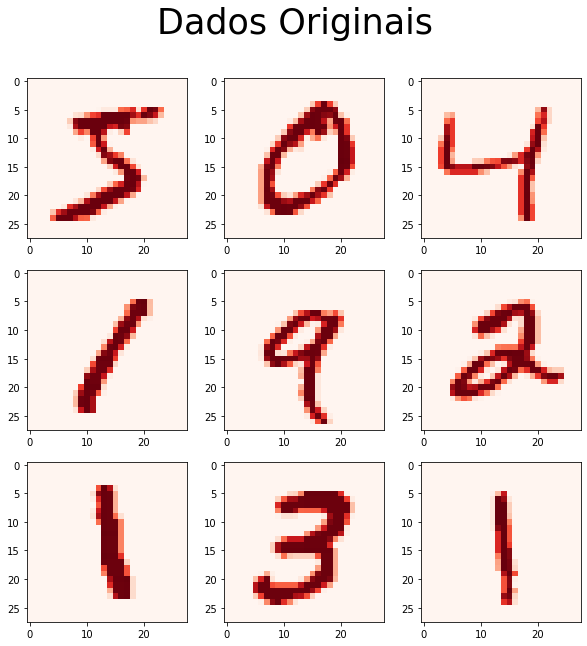

In [ ]:
#Dados originais
plt.figure(figsize=(10,10))
plt.suptitle("Dados Originais", fontsize = 35)
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(xtrain[i].reshape(28,28), cmap='Reds')
plt.show()

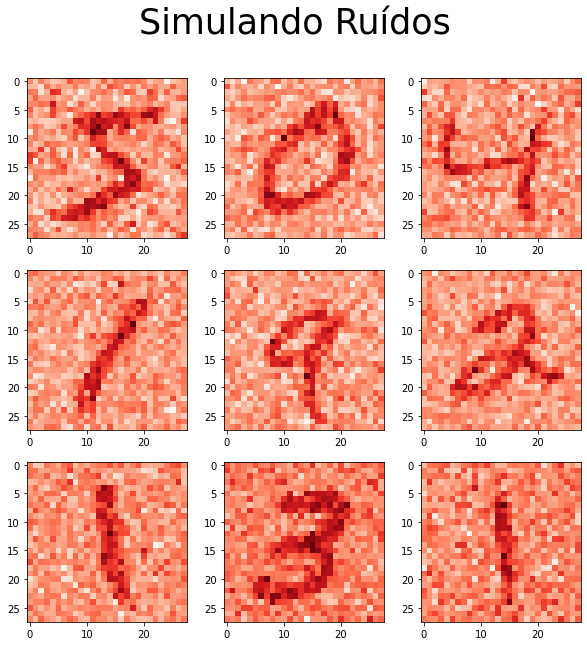

In [ ]:
#Dados com ruídos
plt.figure(figsize=(10,10))
plt.suptitle("Simulando Ruídos", fontsize = 35)
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_treino[i].reshape(28,28), cmap='Reds')
plt.show()

In [ ]:
#Função do Autoencoder
def autoencoder():
    
    inputs = Input(shape=(28,28,1), name='image_input')

    x = inputs
    
    #encoder 
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)

    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    #modelo
    autoencoder = Model(inputs=inputs, outputs=x)
    
    return autoencoder

In [ ]:
x_treino.shape

(60000, 28, 28, 1)

In [ ]:
autoencoder = autoencoder()

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Treinando o autoencoder:
historico = autoencoder.fit(x_treino,
                xtrain,
                validation_data=(x_teste, xtest),
                epochs=10,
                batch_size=300)

Epoch 1/10
200/200 [==============================] - 17s 36ms/step - loss: 0.1677 - val_loss: 0.0998
Epoch 2/10
200/200 [==============================] - 7s 35ms/step - loss: 0.0953 - val_loss: 0.0905
Epoch 3/10
200/200 [==============================] - 7s 35ms/step - loss: 0.0893 - val_loss: 0.0870
Epoch 4/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0865 - val_loss: 0.0852
Epoch 5/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0848 - val_loss: 0.0834
Epoch 6/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0837 - val_loss: 0.0827
Epoch 7/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0828 - val_loss: 0.0817
Epoch 8/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0820 - val_loss: 0.0810
Epoch 9/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0814 - val_loss: 0.0809
Epoch 10/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0809 - val_l

In [ ]:
x_decoded = autoencoder.predict(x_teste)

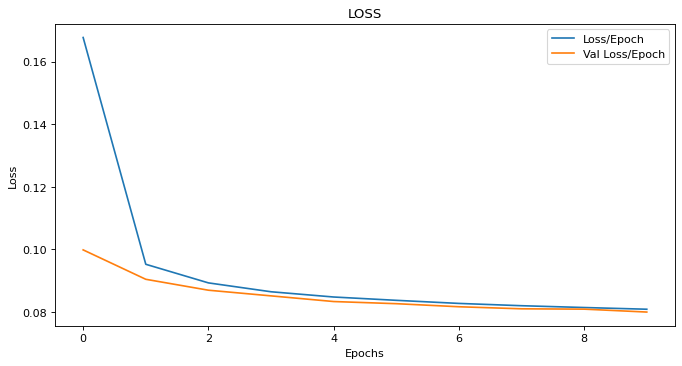

In [ ]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.title("LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(historico.history['loss'], label="Loss/Epoch")
plt.plot(historico.history['val_loss'], label="Val Loss/Epoch")
plt.legend()
plt.show()

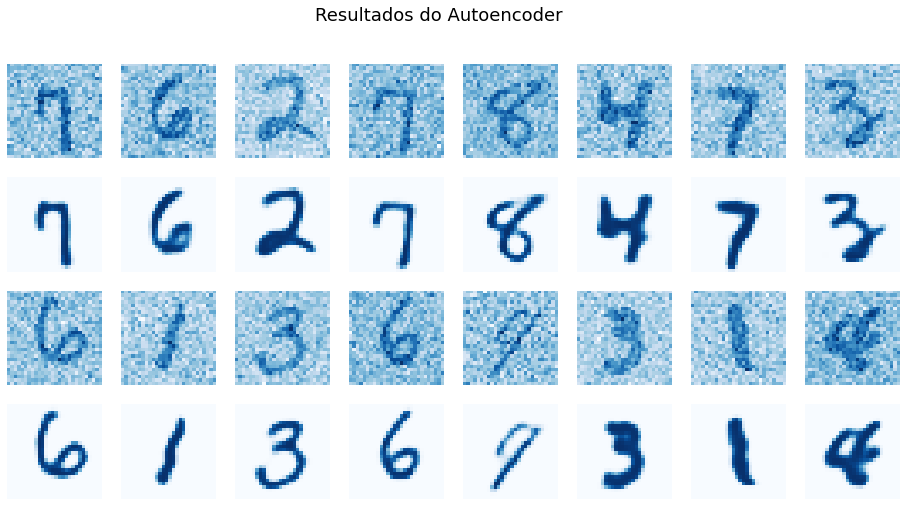

In [ ]:
#Comparando os resultados

rows = 2 
cols = 8 

f = plt.figure(figsize=(2*cols,2*rows*2)) 
for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1))
        plt.imshow(x_teste[(i+10)*cols + j].reshape([28,28]),cmap="Blues") 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1))
        plt.imshow(x_decoded[(i+10)*cols + j].reshape([28,28]),cmap="Blues") 
        plt.axis("off")
        
f.suptitle("Resultados do Autoencoder",fontsize=18)
# plt.savefig("teste_results.png")

plt.show()